## Exercise 2
In the course you learned how to do classificaiton using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy.

Some notes:
1. It should succeed in less than 10 epochs, so it is okay to change epochs to 10, but nothing larger
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!"
3. If you add any additional variables, make sure you use the same names as the ones used in the class

I've started the code for you below -- how would you finish it? 

In [11]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if logs.get('acc') > 0.99 :
            print("\nReached 99% accuracy, stopping training")
            self.model.stop_training = True

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#Normalize
x_train = x_train / 255
x_test = x_test / 255

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(224, activation=tf.nn.relu),
    tf.keras.layers.Dense(112,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])

callback = myCallback()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,callbacks=[callback])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 164us/step - loss: 0.2172 - acc: 0.9352 - val_loss: 0.1179 - val_acc: 0.9622
Epoch 2/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0904 - acc: 0.9726 - val_loss: 0.0909 - val_acc: 0.9713
Epoch 3/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0604 - acc: 0.9815 - val_loss: 0.0755 - val_acc: 0.9751
Epoch 4/10
60000/60000 [==============================] - 7s 119us/step - loss: 0.0453 - acc: 0.9849 - val_loss: 0.0792 - val_acc: 0.9763
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0353 - acc: 0.9889 - val_loss: 0.0695 - val_acc: 0.9785
Epoch 6/10
59552/60000 [============================>.] - ETA: 0s - loss: 0.0286 - acc: 0.9903
Reached 99% accuracy, stopping training
60000/60000 [==============================] - 7s 120us/step - loss: 0.0286 - acc: 0.9903 - val_loss: 0.0841 - val_acc: 0.97

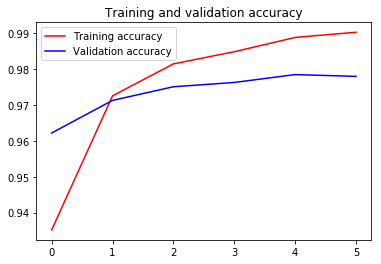

<Figure size 432x288 with 0 Axes>

In [12]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()